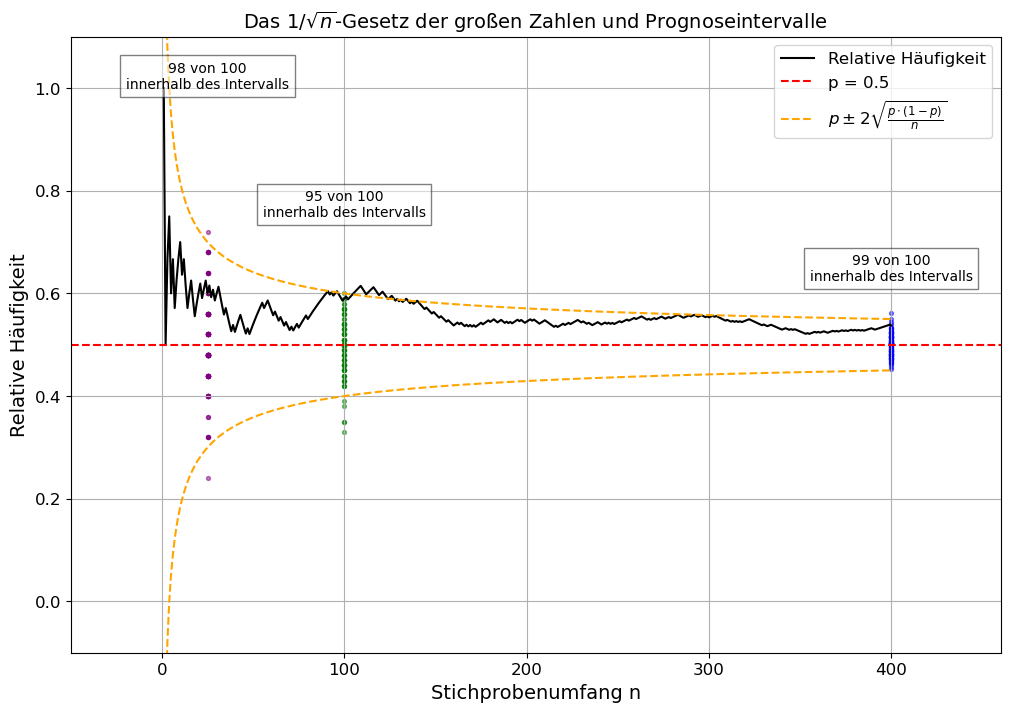

<function __main__.relative_frequency_simulation(n, p, w, dx)>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider

def relative_frequency_simulation(n, p, w, dx):
    trials = np.random.binomial(1, p, n)
    cumulative_frequencies = np.cumsum(trials) / np.arange(1, n+1)
    
    x = np.arange(1, n+1)
    bound = 2 * np.sqrt(p * (1 - p) / x)
    
    fig = plt.subplots(figsize=(12, 8))
    
    # Hauptplot (Trajektorie)
    plt.plot(x, cumulative_frequencies, label='Relative Häufigkeit', color='black')
    plt.axhline(y=p, color='red', linestyle='--', label=f'p = {p}')
    plt.plot(x, p + bound, color='orange', linestyle='--',
             label=r'$p \pm 2\sqrt{\frac{p \cdot(1-p)}{n}}$')
    plt.plot(x, p - bound, color='orange', linestyle='--')
    plt.xlabel('Stichprobenumfang n',fontsize=14)
    plt.ylabel('Relative Häufigkeit',fontsize=14)
    plt.title(r'Das 1/$\sqrt{n}$-Gesetz der großen Zahlen und Prognoseintervalle',
              fontsize=14)
    plt.xlim(-50,1.15*n)
    plt.ylim(-0.1,1.1)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid()
    
    sample_points = [n, n // 4, n // 16]
    colors = ['blue', 'green', 'purple']

    for idx, point in enumerate(sample_points):
        simulated_values = np.random.binomial(point, p, w) / point
        values, counts = np.unique(simulated_values, return_counts=True)
        for value, count in zip(values, counts):
            x_positions=[point+i*dx for i in range(0,count)]
            y_positions = [value] * count
            plt.scatter(x_positions, y_positions, s=8, alpha=0.5, color=colors[idx])

        in_interval = ((simulated_values >= p - 2 * np.sqrt(p * (1 - p) / point)) &
                       (simulated_values <= p + 2 * np.sqrt(p * (1 - p) / point))).sum()
        plt.text(point, p + 5 * np.sqrt(p * (1 - p) / point),
                 f'{in_interval} von {w}\ninnerhalb des Intervalls', ha='center',
                 fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

nWert=400
interact(relative_frequency_simulation, 
         n=IntSlider(min=10, max=1000, step=10, value=nWert, description='n'),
         p=FloatSlider(min=0.1, max=0.9, step=0.05, value=0.5, description='p'),
         w=IntSlider(min=10, max=1000, step=10, value=100, description='w'),
         dx=IntSlider(min=0, max=50, step=1, value=0, description='dx')
    )